In [1]:
#set specific working directory
#setwd("~/Desktop/R_STUFF")

# load performance improvement libraries & enable just in time compiler
library(compiler)
enableJIT(1)

#some environmental variables (decimals)
options=7
options(citr.use_betterbiblatex = FALSE)

[1] 3

In [1]:
#check if required packages are there - if not install them!
requiredPackages = c('gdata','compiler','lsr','sft', 'bibtex', 'psych', 'likert', 'ggplot2', 'reshape2')
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) install.packages(p)
  library(p,character.only = TRUE)
}
#load all the libraries    
lapply(requiredPackages, require, character.only = TRUE)

Loading required package: gdata
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith

Loading required package: compiler
Loading required package: lsr
Loading required package: sft
Warning message:
“package ‘sft’ was built under R version 3.4.3”Loading required package: fda
Warning message:
“package ‘fda’ was built under R version 3.4.1”Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot

Loading required package: SuppDists
Loading required package: bibtex
Warning message:
“package ‘bibtex’ was built under R version 3.4.1”Loading required package: psych
Loading required pac

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

In [17]:
#read the data
data <- read.xls("test_time.xlsx", verbose=FALSE, na.strings=c("NA"))

In [18]:
head(data)

ParticipantNo,ID,Sequence,Condition1,Condition,PDF1,PDF2,TimeTaken_1,TimeTaken_2,TotalTimeTaken
1,-JjAzwjQakZk-3kIbeMfw,1010,1,A,U2PXr4iMBf8Kt-leQI8Ii,iHbGgWtrKNfksdoj9Hxv9,435,1297,1732
1,-JjAzwjQakZk-3kIbeMfw,1010,2,NOA,4gIe5sni3WJJCzNglSdo8,cnDXl97I_WoVUqyIH0HbQ,582,610,1192
2,hNQKTiKtHSY_BmxLyZb9Q,1100,1,A,XOCbiBddVQK3BYy1Ox4lI,oOAy7INgRLumTV3vZWtVM,306,127,433
2,hNQKTiKtHSY_BmxLyZb9Q,1100,2,NOA,XsI2WyPfvOm6Wxr7iwopU,SxykkqJYiPn7MoawJ_SNP,777,756,1533
3,pyTvUi2W85Nb9handPSvZ,101,1,A,gD_JugCFB6D5iV-JIOI0p,4gIe5sni3WJJCzNglSdo8,209,756,965
3,pyTvUi2W85Nb9handPSvZ,101,2,NOA,lJGa9WH4DouLz_639nPQe,VVQyIpJ1qfB9MpYL7evbv,163,713,876


In [19]:
# creating groups
Annotations <- subset(data, Condition=='A')
NoAnnotations <- subset(data, Condition=='NOA')

In [20]:
str(Annotations)
str(NoAnnotations)

'data.frame':	10 obs. of  10 variables:
 $ ParticipantNo : int  1 2 3 4 5 6 7 8 9 10
 $ ID            : Factor w/ 10 levels "-JjAzwjQakZk-3kIbeMfw",..: 1 8 10 3 5 7 6 9 4 2
 $ Sequence      : int  1010 1100 101 1100 101 101 11 1100 11 11
 $ Condition1    : int  1 1 1 1 1 1 1 1 1 1
 $ Condition     : Factor w/ 2 levels "A","NOA": 1 1 1 1 1 1 1 1 1 1
 $ PDF1          : Factor w/ 17 levels "2zFP1Ahjjhq-L21Yi3U_6",..: 15 16 8 4 13 16 15 7 5 3
 $ PDF2          : Factor w/ 18 levels "0nx4Zi7dVYn5EQ3dNItt-",..: 10 13 3 4 17 18 7 1 8 16
 $ TimeTaken_1   : int  435 306 209 256 305 3668 595 163 113 623
 $ TimeTaken_2   : int  1297 127 756 311 1507 2366 1996 232 111 652
 $ TotalTimeTaken: int  1732 433 965 567 1812 6034 2591 395 224 1275
'data.frame':	10 obs. of  10 variables:
 $ ParticipantNo : int  1 2 3 4 5 6 7 8 9 10
 $ ID            : Factor w/ 10 levels "-JjAzwjQakZk-3kIbeMfw",..: 1 8 10 3 5 7 6 9 4 2
 $ Sequence      : int  1010 1100 101 1100 101 101 11 1100 11 11
 $ Condition1    : int  2

In [24]:
# Wilcoxion tests to imvestigate the semi-marginal effects?
wilcox.test(data$Condition1,data$TimeTaken_1,paired=TRUE)
wilcox.test(data$Condition1,data$TimeTaken_2,paired=TRUE)
wilcox.test(data$Condition1,data$TotalTimeTaken,paired=TRUE)


	Wilcoxon signed rank test

data:  data$Condition1 and data$TimeTaken_1
V = 0, p-value = 1.907e-06
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test

data:  data$Condition1 and data$TimeTaken_2
V = 0, p-value = 1.907e-06
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test

data:  data$Condition1 and data$TotalTimeTaken
V = 0, p-value = 1.907e-06
alternative hypothesis: true location shift is not equal to 0


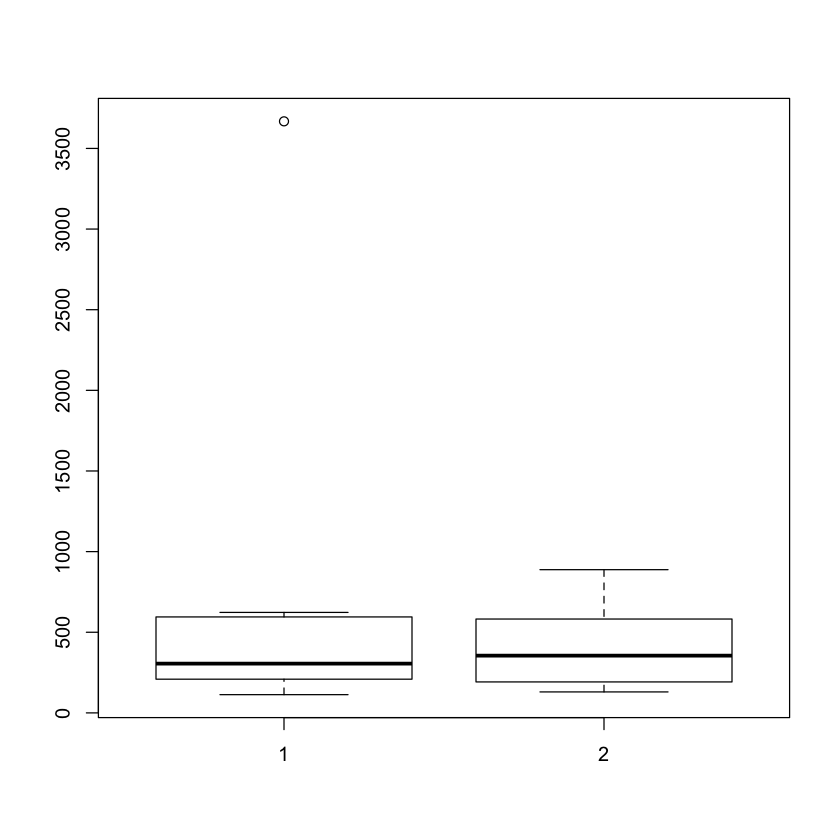

In [34]:
boxplot(data$TimeTaken_1~data$Condition1,data=data)

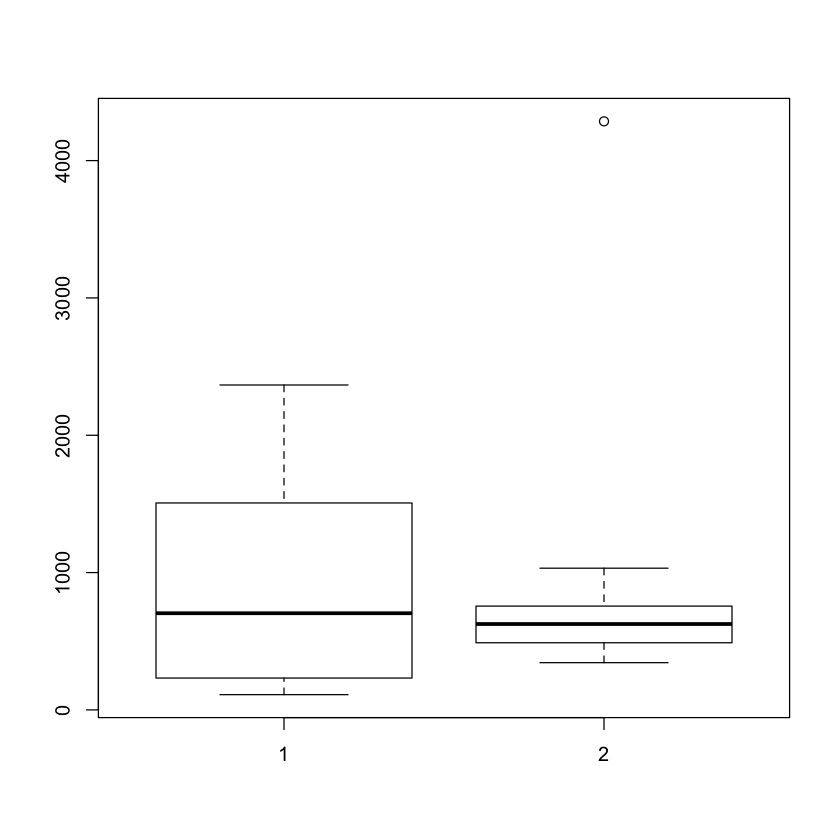

In [35]:
boxplot(data$TimeTaken_2~data$Condition1,data=data)

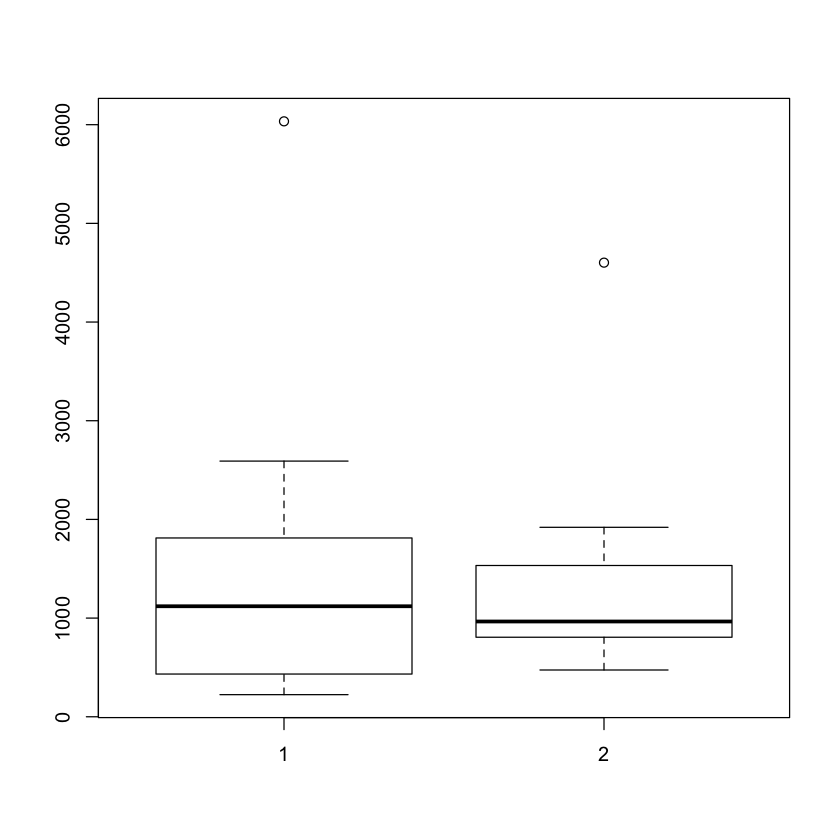

In [36]:
boxplot(data$TotalTimeTaken~data$Condition1,data=data)

In [39]:
sum(data$TimeTaken_1)
sum(data$TimeTaken_2)
sum(data$TotalTimeTaken)

[1] 10886

[1] 19157

[1] 30043

In [52]:
cat("AnnotationsT1: ", sum(Annotations$TimeTaken_1), '\n')
cat("NoAnnotationsT1: ", sum(NoAnnotations$TimeTaken_1), '\n')
cat("AnnotationsT2: ", sum(Annotations$TimeTaken_2), '\n')
cat("NoAnnotationsT2: ", sum(NoAnnotations$TimeTaken_2), '\n')
cat("AnnotationsTT: ", sum(Annotations$TotalTimeTaken), '\n')
cat("NoAnnotationsTT: ", sum(NoAnnotations$TotalTimeTaken), '\n')

AnnotationsT1:  6673 
NoAnnotationsT1:  4213 
AnnotationsT2:  9355 
NoAnnotationsT2:  9802 
AnnotationsTT:  16028 
NoAnnotationsTT:  14015 


#### Looking at the distribution

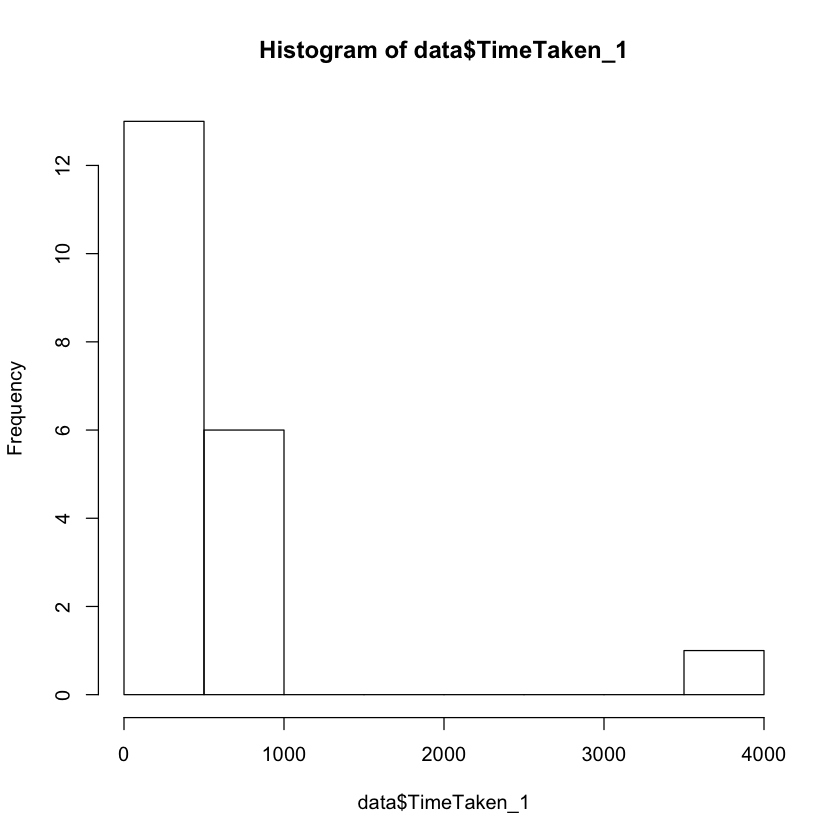

In [53]:
hist(data$TimeTaken_1)

In [54]:
# confirms plot - data unlikely came from normal distribution
shapiro.test(data$TimeTaken_1)


	Shapiro-Wilk normality test

data:  data$TimeTaken_1
W = 0.49023, p-value = 2.596e-07



	Shapiro-Wilk normality test

data:  data$TimeTaken_2
W = 0.73732, p-value = 0.0001153


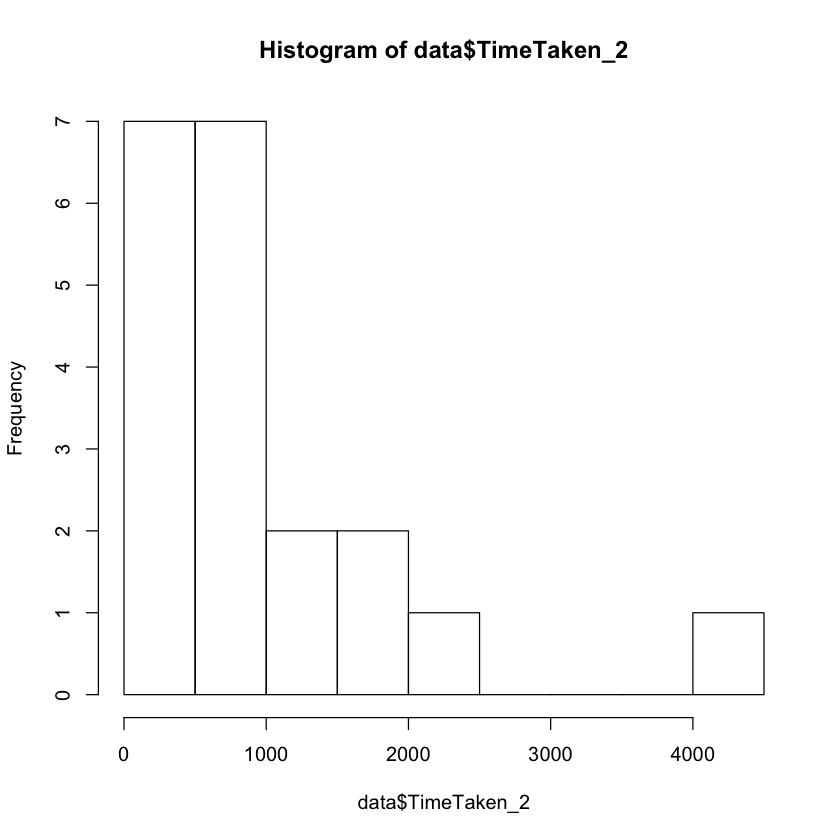

In [55]:
# same here again
hist(data$TimeTaken_2)
shapiro.test(data$TimeTaken_2)


	Shapiro-Wilk normality test

data:  data$TotalTimeTaken
W = 0.73232, p-value = 9.928e-05


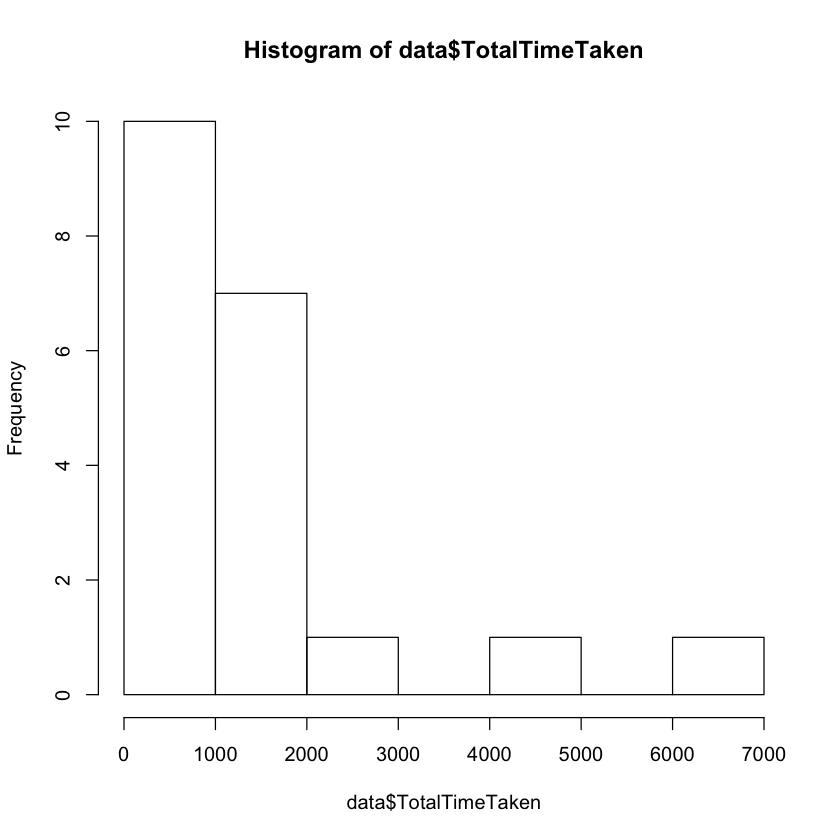

In [56]:
# and again
hist(data$TotalTimeTaken)
shapiro.test(data$TotalTimeTaken)